# Fine-tune ConvNeXT for image classification

This notebook was reproduced from [Niels Rogge notebook](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/ConvNeXT/Fine_tune_ConvNeXT_for_image_classification.ipynb) and created as part of [his YouTube video](https://youtu.be/Hn1IgPY42Bw).

It illustrates how to fine-tune [ConvNeXT](https://huggingface.co/docs/transformers/model_doc/convnext), a state-of-the-art image classifier by Meta AI, on a custom dataset (in this case, the [EuroSAT](https://github.com/phelber/EuroSAT) dataset).

EuroSAT is a novel dataset based on Sentinel-2 satellite images covering 13 spectral bands and consisting out of 10 classes with in total 27,000 labeled and geo-referenced images.

We will use CovNext model to do image classification. in this notebook we'll also use hugging face and pytorch libraries.



## An overview of ConvNeXt

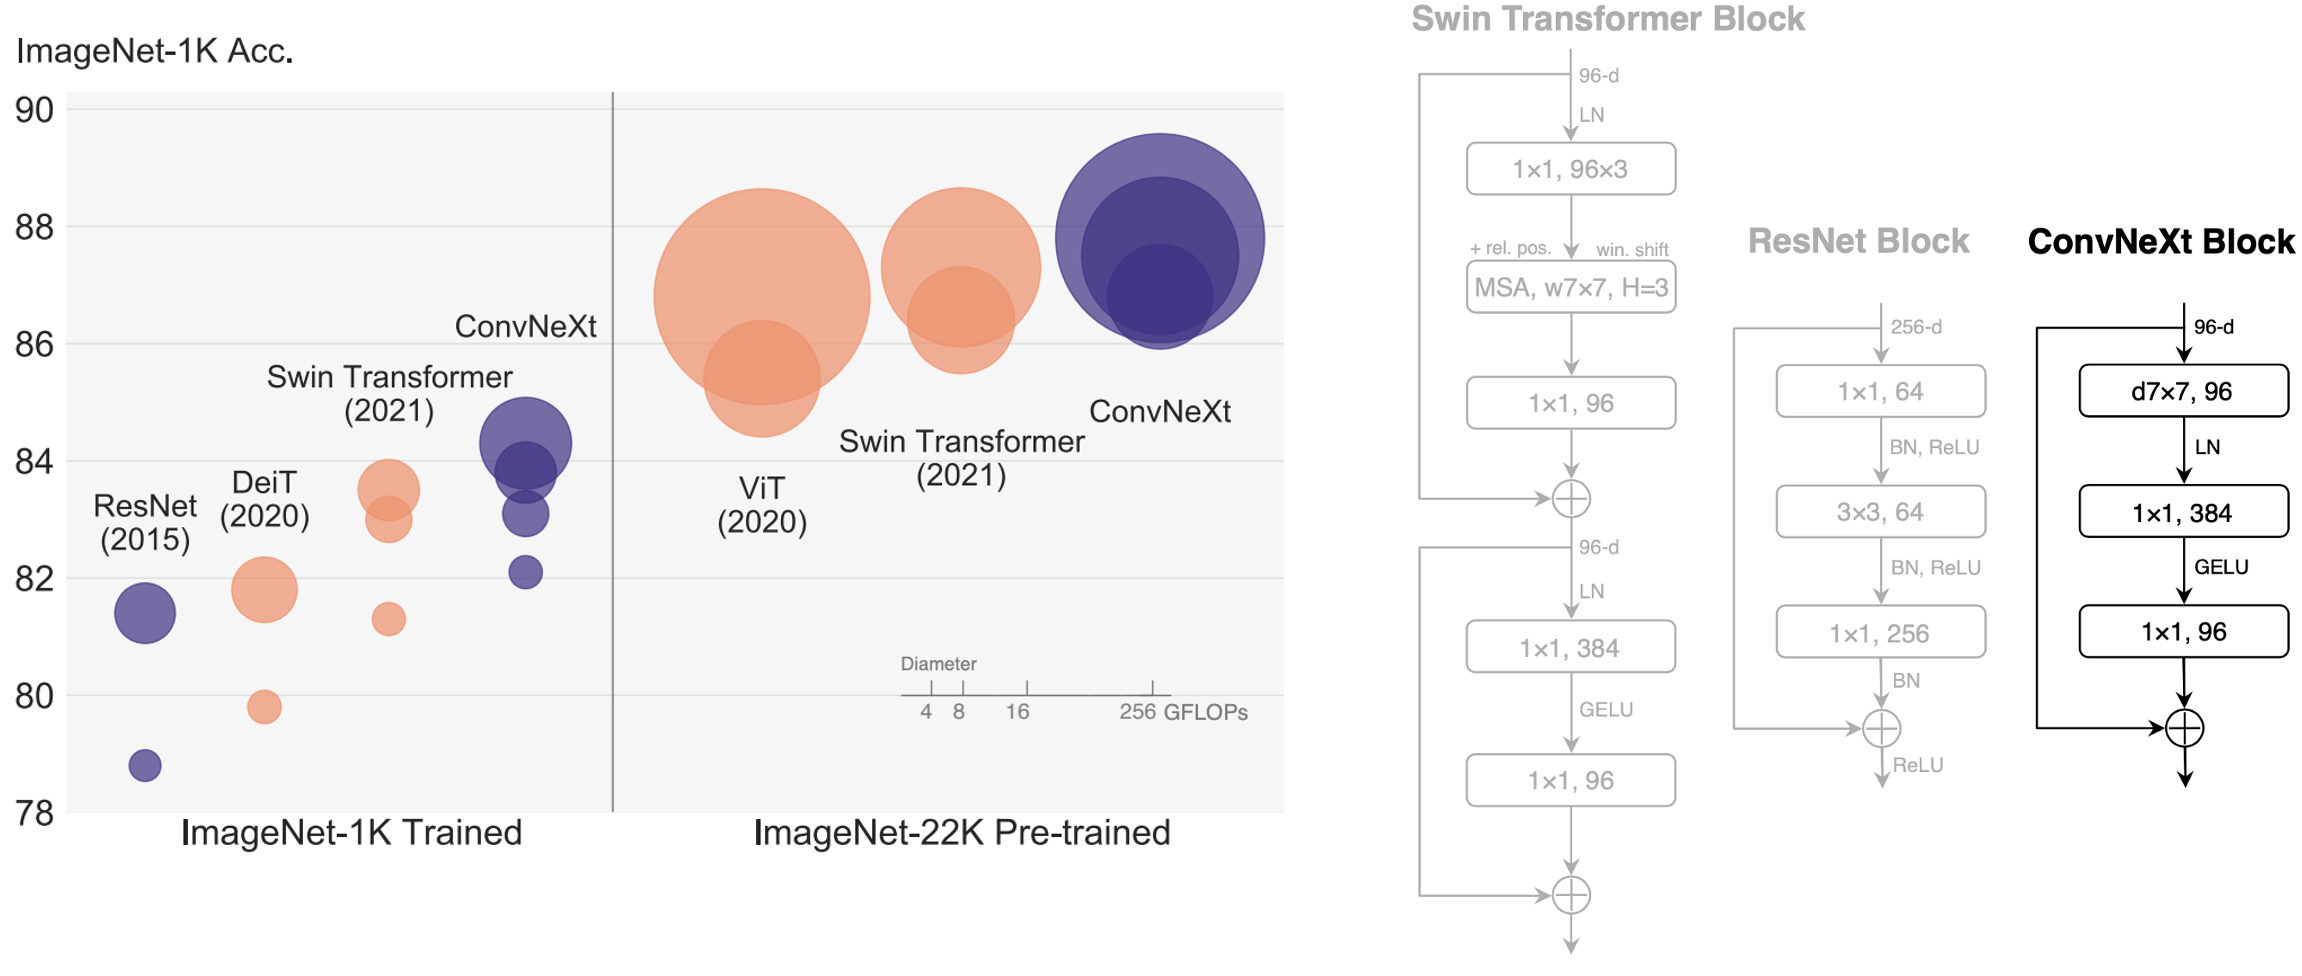
In 2012, the Deep Learning renaissance was largely brought about by ConvNets. the beginning was preceded by the emergence of AlexNet at the "ImageNet moment" in computer vision.

  Until, this moment shows very rapid development over the years with better and more efficient models such as VGGNet, Inception, ResNeXt, DenseNet, MobileNet, and EfficientNet.

  In 2017, Transformers appeared which are widely used in image generation and image-text understanding applications.


  Until finally in early 2021 when Google Research introduced Transformers which could surpass ConvNets' performance in computer vision problems (previously famous and widely used in Natural Language Processing)



  The Transformer model introduces a patch layer that can divide an image into 16 sequential patches of 16 pixels. This model is called Vision Transformer (ViT).



  This model encountered a bottleneck while solving more general computer vision problems which led to the release of the new vision transformer model.



  In mid-2021, the newest Transformer model called Swin Transformer will be released. This model introduces sliding windows (as in CNN) which makes it very similar to ConvNets. This model makes the vision transformer applicable to broader and more general vision problems.



  A recent study claims that by borrowing ideas from the successes of the Vision Transformer and CNN, one can build pure ConvNet whose performance matches high-end models like the Vision Transformer.



This ConvNet takes the standard neural network, ResNet-50, and changes it in such a way that its design is close to the Vision Transformer. In addition, it also surpasses the Transformer in terms of performance.




## Transforming ConvNet to ConvNeXts



1.   Modernizing a standard ResNet

> Using ResNet-50 and trained with the same technique as Vision Transformer. Use the AdamW optimizer, train with more epochs, apply heavy data augmentation techniques, and regularization


2.   Redesigning the Macro design of the ResNet


> Adjusted the number of blocks in each stage so as to improve model accuracy. Make sliding windows like patches on vision transformer


3.   The idea of inception


> Adapting inception to ResNext, including splitting, transforming, and merging information. The main idea is the depth of the convolution


4.   The inverted bottleneck


>In Swin Transformers, each transformer block creates an inverted bottleneck. The output of four blocks combined increases the size of the hidden dimension by four times.



> At ConvNeXts, they copied this idea by designing an inverted bottleneck with an expansion ratio of 4. They found that it improved model performance.




5.   Increasing the kernel size


> Increasing the kernel size is very important because it tries to equalize the power of the vision transformer model with the global receptive field. Swin Transformer tends to limit self attention window. If the ResNets window size increases, then it can be equivalent




6.   Micro design choices

* Replaced Rectified Linear Unit (ReLU) activation function with Gaussian Error Linear Unit (GELU) used on ViT, BERT, and GPT-2 models
* Uses less normalization layer
* Replacing Batch Normalization (BL) with Layer Normalization (LN)







## ConvNext Architecture
  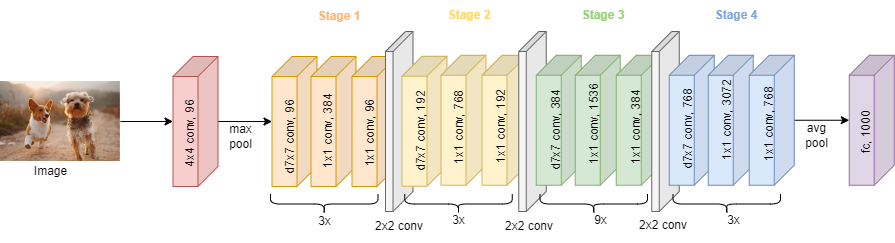
  Picture of ConvNeXt Architecture, where skip connections are not portrayed

The adjustment of 11 distinct features to the ResNet’s architecture increases the accuracy by 3.2%, in total. Now let’s take a look that those adjustments.

  1. Change the compute ratio of the ResNet Blocks used per Stage. ResNet-50 has four stages where block each stage (3:4:6:3). Swin-T also consists of four stages (2:2:6:2). After adjusting the compute ratio of blocks per stage of the ResNet architecture to be more similar to that of the Swin Transformer, ConvNeXt has four stages (3:3:9:3). Accuracy +0.6%, GFLOPS +0.4

2. Change the stem to “Patchify”. The ResNet stem is a 7x7 convolutional layer. But the Swin Transformer uses non-overlapping patches with a small kernel size of four. Therefore, the ConvNeXt stem is now a 4x4 convolutional layer with a stride of four, so that the patches don’t overlap. Accuracy +0.1%, GFLOPS -0.1

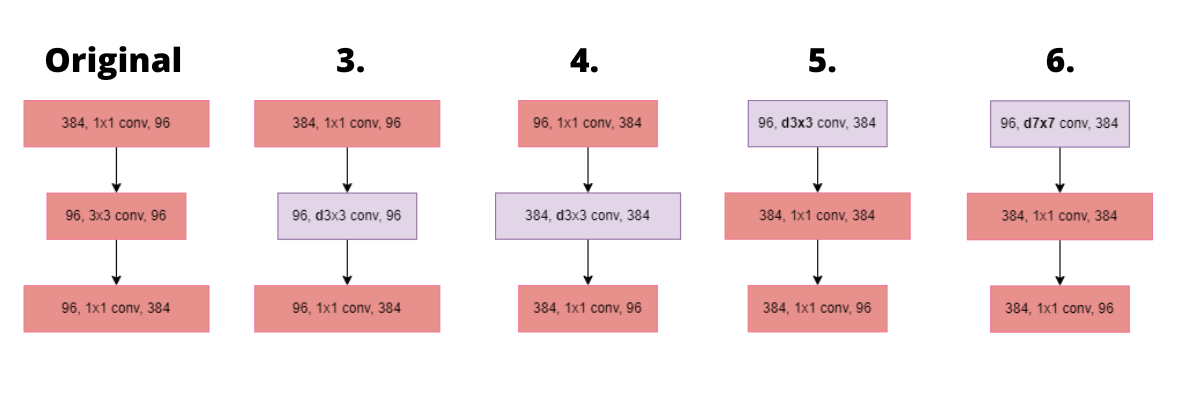

Next, the minor change from Resnet block:

3. Change the 3x3 convolutional layer to a depthwise convolution. Depthwise convolution in its essence is grouped convolution, where the number of groups is equal to the number of channels. This operation is similar to taking the weighted sum in self-attention. Accuracy +1.0%, GFLOPS +0.9

4. Invert the bottleneck. Change the sizes of the convolutional layers in a block so that the block in the centre is the largest. Accuracy +0.1%, GFLOPS -0.7

5. Move the depthwise convolutional[SZ3] layer up so that it is now the first layer in the block. Accuracy -0.1, GFLOPS -0.5

6. Increase the kernel size of the first layer in the block to a (depthwise) 7x7 kernel. Accuracy +0.7, GFLOPS +0.1

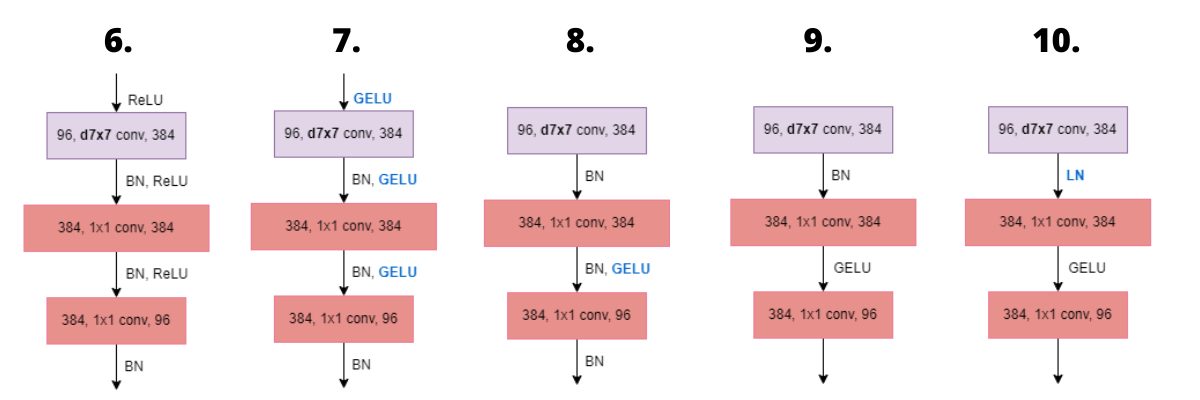

7. Replace all the Rectified Linear Units (ReLU) in the activation layers with Gaussian Error Linear Units (GELU) as they are smoother and used by Swin Transformers. Accuracy +-0%

8. Reduce the number of activation functions and keep only the one after the inverted bottleneck. Accuracy +0.7%

9. Reduce the number of normalisation layers and keep only the one before the inverted bottleneck. Accuracy +0.1%

10. Replace Batch Normalisation (BN) with Layer Normalisation (LN). +0.1%

11. Add separate downsampling layers between stages that consist of a layer normalisation, a 2x2 conv layer with a stride of 2 and another layer normalisation. Also, add layer normalisations before the first stage and after the average pooling after the fourth stage. Accuracy +0.5%, GFLOPS +0.3

## Set-up environment

In [ ]:
# install libraries transformer from hugging face
!pip install -q transformers datasets

     |████████████████████████████████| 3.8 MB 7.5 MB/s 
     |████████████████████████████████| 325 kB 70.1 MB/s 
     |████████████████████████████████| 6.5 MB 52.4 MB/s 
     |████████████████████████████████| 895 kB 56.1 MB/s 
     |████████████████████████████████| 596 kB 76.4 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 136 kB 67.0 MB/s 
     |████████████████████████████████| 212 kB 75.5 MB/s 
     |████████████████████████████████| 1.1 MB 58.8 MB/s 
     |████████████████████████████████| 127 kB 57.5 MB/s 
     |████████████████████████████████| 271 kB 76.1 MB/s 
     |████████████████████████████████| 144 kB 75.7 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which i

## Load dataset

In [ ]:
from datasets import load_dataset

# we can load a custom dataset using the "imagefolder" feature
# details: https://huggingface.co/docs/datasets/image_process#imagefolder
dataset = load_dataset("imagefolder", data_files="https://madm.dfki.de/files/sentinel/EuroSAT.zip")

Using custom data configuration default-0537267e6f812d56


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset image_folder downloaded and prepared to /root/.cache/huggingface/datasets/image_folder/default-0537267e6f812d56/0.0.0/ee92df8e96c6907f3c851a987be3fd03d4b93b247e727b69a8e23ac94392a091. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset["train"].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(num_classes=10, names=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'], id=None)}

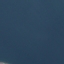

In [ ]:
example = dataset["train"][0]
example["image"]

In [ ]:
example["label"]

9

In [ ]:
labels = dataset["train"].features["label"].names
print(labels)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [ ]:
# mapping id to label and viceversa (usedul when performing inference with trained model)
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
print(id2label)

{0: 'AnnualCrop', 1: 'Forest', 2: 'HerbaceousVegetation', 3: 'Highway', 4: 'Industrial', 5: 'Pasture', 6: 'PermanentCrop', 7: 'Residential', 8: 'River', 9: 'SeaLake'}


In [ ]:
id2label[3]

'Highway'

## Push dataset to the hub

In [ ]:
# login to hugging face
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
# dataset.push_to_hub("nielsr/eurosat-demo")

In [ ]:
from datasets import load_dataset

dataset = load_dataset("nielsr/eurosat-demo")

Using custom data configuration nielsr--eurosat-demo-6d87f7d839540879


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/nielsr--eurosat-demo-6d87f7d839540879/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

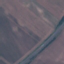

In [ ]:
dataset["train"][0]["image"]

## Process data

In [ ]:
# make feature extractor
from transformers import ConvNextFeatureExtractor

feature_extractor = ConvNextFeatureExtractor.from_pretrained("facebook/convnext-tiny-224")

Downloading:   0%|          | 0.00/266 [00:00<?, ?B/s]

In [ ]:
print(feature_extractor)

ConvNextFeatureExtractor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ConvNextFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "size": 224
}



From the model above, the picture were expecting a size of 224 with standart deviation and mean that need to use to prepare images for the model

So, we are gonna apply some image transformations with data augmentation methods, in oder to do that we are using torchvision packages from pytoch

In [ ]:
from torchvision.transforms import (
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    ToTensor,
)

# after resize the image, we need to normalize the color channels
normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

# list of transformation that we need
transform = Compose(
    [
     RandomResizedCrop(feature_extractor.size),
     RandomHorizontalFlip(),
     ToTensor(),
     normalize
    ]
)

# make custom fucntion to entire dataset
def train_transforms(examples):
  examples["pixel_values"] = [transform(image.convert("RGB")) for image in examples["image"]] # adding new coloum to dataset

  return examples

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 27000
    })
})

In [ ]:
# transfrom dataset
processed_dataset = dataset.with_transform(train_transforms)

In [ ]:
processed_dataset["train"][0]["pixel_values"].shape

torch.Size([3, 224, 224])

## Define model

In [ ]:
len(labels)

10

In [ ]:
# we use convnext-tiny-224 model from hugging face
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained("facebook/convnext-tiny-224",
                                                        num_labels=len(labels),
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        ignore_mismatched_sizes=True)

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/109M [00:00<?, ?B/s]

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-tiny-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We instantiated the classfication head

## Move model to GPU

In [ ]:
import torch 

device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

ConvNextForImageClassification(
  (convnext): ConvNextModel(
    (embeddings): ConvNextEmbeddings(
      (patch_embeddings): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (layernorm): ConvNextLayerNorm()
    )
    (encoder): ConvNextEncoder(
      (stages): ModuleList(
        (0): ConvNextStage(
          (downsampling_layer): Identity()
          (layers): Sequential(
            (0): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              (pwconv1): Linear(in_features=96, out_features=384, bias=True)
              (act): GELUActivation()
              (pwconv2): Linear(in_features=384, out_features=96, bias=True)
              (drop_path): Identity()
            )
            (1): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              

In [ ]:
processed_dataset["train"][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7FBC1A9610D0>,
 'label': 3,
 'pixel_values': tensor([[[-0.4226, -0.4226, -0.4226,  ..., -0.0972, -0.0972, -0.0972],
          [-0.4226, -0.4226, -0.4226,  ..., -0.0972, -0.0972, -0.0972],
          [-0.4226, -0.4226, -0.4226,  ..., -0.0972, -0.0972, -0.0972],
          ...,
          [-0.4397, -0.4397, -0.4397,  ..., -0.4397, -0.4397, -0.4397],
          [-0.4397, -0.4397, -0.4397,  ..., -0.4397, -0.4397, -0.4397],
          [-0.4397, -0.4397, -0.4397,  ..., -0.4397, -0.4397, -0.4397]],
 
         [[-0.3375, -0.3375, -0.3375,  ..., -0.2500, -0.2500, -0.2500],
          [-0.3375, -0.3375, -0.3375,  ..., -0.2500, -0.2500, -0.2500],
          [-0.3375, -0.3375, -0.3375,  ..., -0.2500, -0.2500, -0.2500],
          ...,
          [-0.3725, -0.3725, -0.3725,  ..., -0.4251, -0.4251, -0.4251],
          [-0.3725, -0.3725, -0.3725,  ..., -0.4251, -0.4251, -0.4251],
          [-0.3725, -0.3725, -0.3725,  ..., -0.4251, -0

In [ ]:
# import data loader
from torch.utils.data import DataLoader

# data loader will iterate over the batches of the examples of dataset and provide to the model
# dataset needs to batcheed together
def collate_fn(examples):
  pixel_values = torch.stack([example["pixel_values"] for example in examples]) #stacking pixel_value
  labels = torch.tensor([example["label"] for example in examples]) # change label (integert) to pytorch tensor


  return {"pixel_values": pixel_values, "labels": labels}

dataloader = DataLoader(processed_dataset["train"], collate_fn=collate_fn, batch_size=4, shuffle=True)

In [ ]:
# taking first batch from our data loader
batch = next(iter(dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


## Train the model

In [ ]:
from tqdm.notebook import tqdm

# define optimizer AdamW
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

model.train()
for epoch in range(10): # running in 10 epochc
  print("Epoch:", epoch)
  correct = 0
  total = 0
  for idx, batch in enumerate(tqdm(dataloader)):
    # move batch to GPU
    batch = {k:v.to(device) for k,v in batch.items()}

    optimizer.zero_grad()

    # forward pass
    outputs = model(pixel_values=batch["pixel_values"],
                    labels=batch["labels"])
    
    loss, logits = outputs.loss, outputs.logits

    # compute gradient
    loss.backward()
    optimizer.step()

    # metrics
    total += batch["labels"].shape[0]
    predicted = logits.argmax(-1)
    correct += (predicted == batch["labels"]).sum().item()

    accuracy = correct/total

    if idx % 100 == 0:
      print(f"Loss after {idx} steps:", loss.item())
      print(f"Accuracy after {idx} steps:", accuracy)

Epoch: 0


  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.4167359471321106
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.13225021958351135
Accuracy after 100 steps: 0.7475247524752475
Loss after 200 steps: 0.8036932945251465
Accuracy after 200 steps: 0.7810945273631841
Loss after 300 steps: 0.45057225227355957
Accuracy after 300 steps: 0.8006644518272426
Loss after 400 steps: 0.1012667715549469
Accuracy after 400 steps: 0.8273067331670823
Loss after 500 steps: 0.46452900767326355
Accuracy after 500 steps: 0.8318363273453094
Loss after 600 steps: 0.03731042519211769
Accuracy after 600 steps: 0.8456738768718802
Loss after 700 steps: 0.04938995838165283
Accuracy after 700 steps: 0.854493580599144
Loss after 800 steps: 0.10590918362140656
Accuracy after 800 steps: 0.8579900124843945
Loss after 900 steps: 0.2545892298221588
Accuracy after 900 steps: 0.8607103218645948
Loss after 1000 steps: 0.6428396105766296
Accuracy after 1000 steps: 0.8638861138861139
Loss after 1100 steps: 0.39346641302108765
Accuracy after 1100 ste

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.011292369104921818
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.8961852788925171
Accuracy after 100 steps: 0.9504950495049505
Loss after 200 steps: 0.010702572762966156
Accuracy after 200 steps: 0.9514925373134329
Loss after 300 steps: 0.028890706598758698
Accuracy after 300 steps: 0.9559800664451827
Loss after 400 steps: 0.006878295447677374
Accuracy after 400 steps: 0.9544887780548629
Loss after 500 steps: 0.2631339132785797
Accuracy after 500 steps: 0.9510978043912176
Loss after 600 steps: 0.0273672454059124
Accuracy after 600 steps: 0.9504991680532446
Loss after 700 steps: 0.027624839916825294
Accuracy after 700 steps: 0.9514978601997147
Loss after 800 steps: 0.008612778037786484
Accuracy after 800 steps: 0.947565543071161
Loss after 900 steps: 0.5497620105743408
Accuracy after 900 steps: 0.9481132075471698
Loss after 1000 steps: 0.1383814960718155
Accuracy after 1000 steps: 0.9488011988011988
Loss after 1100 steps: 0.012798572890460491
Accuracy after 1

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.06185512617230415
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.21208643913269043
Accuracy after 100 steps: 0.9381188118811881
Loss after 200 steps: 0.005471528507769108
Accuracy after 200 steps: 0.9539800995024875
Loss after 300 steps: 0.00843565072864294
Accuracy after 300 steps: 0.9551495016611296
Loss after 400 steps: 0.1232781782746315
Accuracy after 400 steps: 0.9501246882793017
Loss after 500 steps: 0.12490581721067429
Accuracy after 500 steps: 0.9525948103792415
Loss after 600 steps: 0.030166970565915108
Accuracy after 600 steps: 0.949667221297837
Loss after 700 steps: 0.0404777005314827
Accuracy after 700 steps: 0.9522111269614836
Loss after 800 steps: 0.005521424114704132
Accuracy after 800 steps: 0.9531835205992509
Loss after 900 steps: 0.007269063964486122
Accuracy after 900 steps: 0.9544950055493896
Loss after 1000 steps: 0.20961472392082214
Accuracy after 1000 steps: 0.9530469530469531
Loss after 1100 steps: 0.018100377172231674
Accuracy after 

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.005073942709714174
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.8119612336158752
Accuracy after 100 steps: 0.9504950495049505
Loss after 200 steps: 0.17842139303684235
Accuracy after 200 steps: 0.9527363184079602
Loss after 300 steps: 0.8503753542900085
Accuracy after 300 steps: 0.9485049833887044
Loss after 400 steps: 0.02778717316687107
Accuracy after 400 steps: 0.9526184538653366
Loss after 500 steps: 0.08483904600143433
Accuracy after 500 steps: 0.9515968063872255
Loss after 600 steps: 0.0012745677959173918
Accuracy after 600 steps: 0.9517470881863561
Loss after 700 steps: 0.005641628056764603
Accuracy after 700 steps: 0.9550641940085592
Loss after 800 steps: 0.6319754719734192
Accuracy after 800 steps: 0.9572409488139825
Loss after 900 steps: 0.003944942727684975
Accuracy after 900 steps: 0.9583795782463929
Loss after 1000 steps: 0.004290894139558077
Accuracy after 1000 steps: 0.957042957042957
Loss after 1100 steps: 0.033528104424476624
Accuracy after

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.0021274955943226814
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.007741900160908699
Accuracy after 100 steps: 0.9801980198019802
Loss after 200 steps: 0.07838080823421478
Accuracy after 200 steps: 0.9776119402985075
Loss after 300 steps: 0.01564148999750614
Accuracy after 300 steps: 0.9775747508305648
Loss after 400 steps: 0.0014632679522037506
Accuracy after 400 steps: 0.9788029925187033
Loss after 500 steps: 0.0035212223883718252
Accuracy after 500 steps: 0.9780439121756487
Loss after 600 steps: 0.05187685787677765
Accuracy after 600 steps: 0.9771214642262895
Loss after 700 steps: 0.015866845846176147
Accuracy after 700 steps: 0.9753922967189729
Loss after 800 steps: 0.006255805026739836
Accuracy after 800 steps: 0.9734706616729089
Loss after 900 steps: 0.0009403584408573806
Accuracy after 900 steps: 0.9716981132075472
Loss after 1000 steps: 0.11906805634498596
Accuracy after 1000 steps: 0.9712787212787213
Loss after 1100 steps: 0.012334824539721012
Accur

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.32941898703575134
Accuracy after 0 steps: 0.75
Loss after 100 steps: 0.0010939016938209534
Accuracy after 100 steps: 0.9579207920792079
Loss after 200 steps: 1.818398356437683
Accuracy after 200 steps: 0.9614427860696517
Loss after 300 steps: 0.002042206237092614
Accuracy after 300 steps: 0.9667774086378738
Loss after 400 steps: 0.010556340217590332
Accuracy after 400 steps: 0.9694513715710723
Loss after 500 steps: 0.003962830174714327
Accuracy after 500 steps: 0.968562874251497
Loss after 600 steps: 0.050440236926078796
Accuracy after 600 steps: 0.968801996672213
Loss after 700 steps: 0.001331370323896408
Accuracy after 700 steps: 0.9679029957203994
Loss after 800 steps: 0.11828165501356125
Accuracy after 800 steps: 0.9691011235955056
Loss after 900 steps: 0.0006547746015712619
Accuracy after 900 steps: 0.9689234184239733
Loss after 1000 steps: 0.329766184091568
Accuracy after 1000 steps: 0.9662837162837162
Loss after 1100 steps: 0.35716283321380615
Accuracy afte

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.0013678036630153656
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.02029513008892536
Accuracy after 100 steps: 0.9554455445544554
Loss after 200 steps: 0.005568472668528557
Accuracy after 200 steps: 0.9664179104477612
Loss after 300 steps: 0.010533750057220459
Accuracy after 300 steps: 0.9634551495016611
Loss after 400 steps: 0.1162056028842926
Accuracy after 400 steps: 0.9619700748129676
Loss after 500 steps: 0.007850774563848972
Accuracy after 500 steps: 0.9635728542914171
Loss after 600 steps: 0.015390565618872643
Accuracy after 600 steps: 0.9654742096505824
Loss after 700 steps: 0.07195491343736649
Accuracy after 700 steps: 0.9668330955777461
Loss after 800 steps: 0.377245157957077
Accuracy after 800 steps: 0.966916354556804
Loss after 900 steps: 0.000585822737775743
Accuracy after 900 steps: 0.9664261931187569
Loss after 1000 steps: 0.7812296152114868
Accuracy after 1000 steps: 0.9665334665334665
Loss after 1100 steps: 0.3075970709323883
Accuracy after 1

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.00754961185157299
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.0387725867331028
Accuracy after 100 steps: 0.9455445544554455
Loss after 200 steps: 0.010568711906671524
Accuracy after 200 steps: 0.9614427860696517
Loss after 300 steps: 0.043083176016807556
Accuracy after 300 steps: 0.9642857142857143
Loss after 400 steps: 0.0018155360594391823
Accuracy after 400 steps: 0.9650872817955112
Loss after 500 steps: 0.00019235290528740734
Accuracy after 500 steps: 0.967564870259481
Loss after 600 steps: 0.008265075273811817
Accuracy after 600 steps: 0.968801996672213
Loss after 700 steps: 0.005011674948036671
Accuracy after 700 steps: 0.9693295292439372
Loss after 800 steps: 0.0008131247595883906
Accuracy after 800 steps: 0.9684769038701623
Loss after 900 steps: 0.0032318662852048874
Accuracy after 900 steps: 0.9680910099889012
Loss after 1000 steps: 0.11108507961034775
Accuracy after 1000 steps: 0.9682817182817183
Loss after 1100 steps: 0.007502023596316576
Accura

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.1582196056842804
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.008916087448596954
Accuracy after 100 steps: 0.9678217821782178
Loss after 200 steps: 0.05386865884065628
Accuracy after 200 steps: 0.9601990049751243
Loss after 300 steps: 0.5348714590072632
Accuracy after 300 steps: 0.9667774086378738
Loss after 400 steps: 0.0025995709002017975
Accuracy after 400 steps: 0.9713216957605985
Loss after 500 steps: 0.002155557507649064
Accuracy after 500 steps: 0.9725548902195609
Loss after 600 steps: 0.007117483299225569
Accuracy after 600 steps: 0.9733777038269551
Loss after 700 steps: 0.013213475234806538
Accuracy after 700 steps: 0.9721825962910129
Loss after 800 steps: 0.006017250008881092
Accuracy after 800 steps: 0.9725343320848939
Loss after 900 steps: 0.015225857496261597
Accuracy after 900 steps: 0.9716981132075472
Loss after 1000 steps: 0.0017429892905056477
Accuracy after 1000 steps: 0.9725274725274725
Loss after 1100 steps: 0.0321476049721241
Accuracy a

  0%|          | 0/6750 [00:00<?, ?it/s]

Loss after 0 steps: 0.04875260218977928
Accuracy after 0 steps: 1.0
Loss after 100 steps: 0.057947788387537
Accuracy after 100 steps: 0.9653465346534653
Loss after 200 steps: 0.01978490501642227
Accuracy after 200 steps: 0.9751243781094527
Loss after 300 steps: 0.0004037608450744301
Accuracy after 300 steps: 0.9700996677740864
Loss after 400 steps: 0.0010733880335465074
Accuracy after 400 steps: 0.9713216957605985
Loss after 500 steps: 0.000641913153231144
Accuracy after 500 steps: 0.9715568862275449
Loss after 600 steps: 0.002180470386520028
Accuracy after 600 steps: 0.9737936772046589
Loss after 700 steps: 0.00413261353969574
Accuracy after 700 steps: 0.9732524964336662
Loss after 800 steps: 0.0607028603553772
Accuracy after 800 steps: 0.9731585518102372
Loss after 900 steps: 0.022293390706181526
Accuracy after 900 steps: 0.9739178690344062
Loss after 1000 steps: 0.0023417682386934757
Accuracy after 1000 steps: 0.9735264735264735
Loss after 1100 steps: 0.017473218962550163
Accuracy a

## Push it to the hub

In [ ]:
# store model to the hugging face hub for further use
repo_name = "nielsr/convnext-tiny-finetuned-eurosat"

model.push_to_hub(repo_name)
feature_extractor.push_to_hub(repo_name)

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:1004: FutureWarning: `create_repo` now takes `token` as an optional positional argument. Be sure to adapt your code!
  FutureWarning,
Cloning https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat into local empty directory.


Upload file pytorch_model.bin:   0%|          | 3.34k/106M [00:00<?, ?B/s]

To https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat
   73b78e0..7a2e6c0  main -> main

To https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat
   7a2e6c0..4f3580e  main -> main



'https://huggingface.co/nielsr/convnext-tiny-finetuned-eurosat/commit/4f3580e91046d22e9917fd94a2a36e23314e80fd'

## Inference

In [ ]:
# Reloaded feature extractor and model from hub
from transformers import AutoFeatureExtractor, AutoModelForImageClassification

feature_extractor = AutoFeatureExtractor.from_pretrained("nielsr/convnext-tiny-finetuned-eurosat")
model = AutoModelForImageClassification.from_pretrained("nielsr/convnext-tiny-finetuned-eurosat")

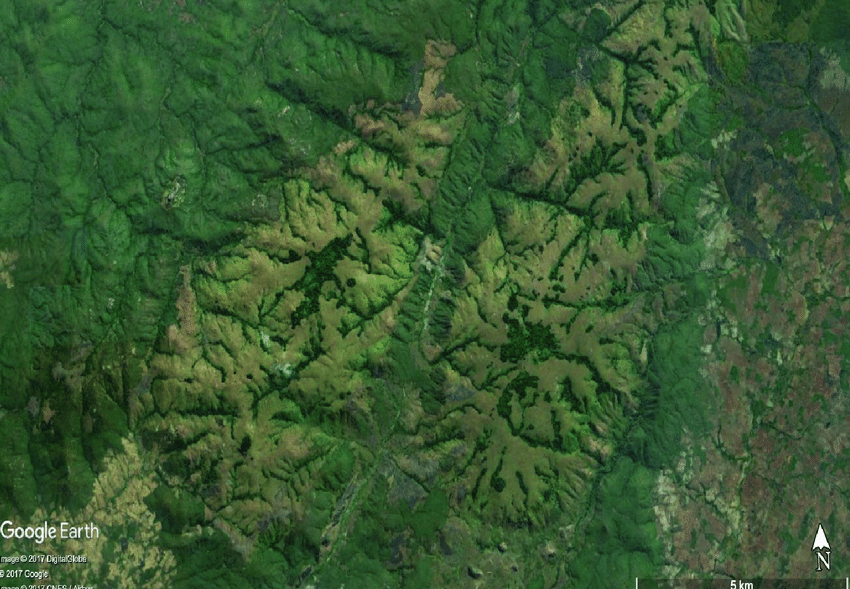

In [ ]:
# test some image
from PIL import Image
import requests

url = "https://www.researchgate.net/profile/Sam-Jones-35/publication/320710912/figure/fig11/AS:667901359050755@1536251501500/Google-earth-satellite-imagery-of-the-Njesi-Plateau-showing-dark-green-forest-patches.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
# prepare image for model
pixel_values = feature_extractor(image.convert("RGB"), return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [ ]:
import torch

# perform forward pass
with torch.no_grad():
  outputs = model(pixel_values)
  logits = outputs.logits # normalized score

In [ ]:
print(logits.shape)

torch.Size([1, 10])


In [ ]:
# predict the image
predicted_class_idx = logits.argmax(-1).item()
print(model.config.id2label[predicted_class_idx])

Forest


## Pipeline API

In [ ]:
# Also we can use Api method
from transformers import pipeline

pipe = pipeline("image-classification",
                model=model,
                feature_extractor=feature_extractor)

In [ ]:
pipe(image)

[{'label': 'Forest', 'score': 0.9989117383956909},
 {'label': 'HerbaceousVegetation', 'score': 0.0005626519559882581},
 {'label': 'Pasture', 'score': 0.00034275249345228076},
 {'label': 'AnnualCrop', 'score': 5.9258782130200416e-05},
 {'label': 'SeaLake', 'score': 4.3437339627416804e-05}]